In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv'
pop_df = pd.read_csv(url)
pop_df
# pop_df = pd.read_html(url)

Rank                 State Postal  Population
0      1               Alabama     AL   4849377.0
1      2                Alaska     AK    736732.0
2      3               Arizona     AZ   6731484.0
3      4              Arkansas     AR   2966369.0
4      5            California     CA  38802500.0
5      6              Colorado     CO   5355866.0
6      7           Connecticut     CT   3596677.0
7      8              Delaware     DE    935614.0
8      9  District of Columbia     DC    658893.0
9     10               Florida     FL  19893297.0
10    11               Georgia     GA  10097343.0
11    12                Hawaii     HI   1419561.0
12    13                 Idaho     ID   1634464.0
13    14              Illinois     IL  12880580.0
14    15               Indiana     IN   6596855.0
15    16                  Iowa     IA   3107126.0
16    17                Kansas     KS   2904021.0
17    18              Kentucky     KY   4413457.0
18    19             Louisiana     LA   4649676.0
19    20                 Maine     ME   1330089.0
20    21              Maryland     MD   5976407.0
21    22         Massachusetts     MA   6745408.0
22    23              Michigan     MI   9909877.0
23    24             Minnesota     MN   5457173.0
24    25           Mississippi     MS   2994079.0
25    26              Missouri     MO   6063589.0
26    27               Montana     MT   1023579.0
27    28              Nebraska     NE   1881503.0
28    29                Nevada     NV   2839098.0
29    30         New Hampshire     NH   1326813.0
30    31            New Jersey     NJ   8938175.0
31    32            New Mexico     NM   2085572.0
32    33              New York     NY  19746227.0
33    34        North Carolina     NC   9943964.0
34    35          North Dakota     ND    739482.0
35    36                  Ohio     OH  11594163.0
36    37              Oklahoma     OK   3878051.0
37    38                Oregon     OR   3970239.0
38    39          Pennsylvania     PA  12787209.0
39    40           Puerto Rico     PR   3548397.0
40    41          Rhode Island     RI   1055173.0
41    42        South Carolina     SC   4832482.0
42    43          South Dakota     SD    853175.0
43    44             Tennessee     TN   6549352.0
44    45                 Texas     TX  26956958.0
45    46                  Utah     UT   2942902.0
46    47               Vermont     VT    626562.0
47    48              Virginia     VA   8326289.0
48    49            Washington     WA   7061530.0
49    50         West Virginia     WV   1850326.0
50    51             Wisconsin     WI   5757564.0
51    52               Wyoming     WY    584153.0

In [3]:
pop_df.drop(['Rank'], axis=1, inplace=True)

In [5]:
population_dict = pop_df.drop(['Postal'], axis=1).set_index('State').T.to_dict('list')


# Pre-processing

In [16]:
'''STEP 1: Pre-processing the dataframes'''
# NY live COVID data
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
df = pd.read_csv(url, parse_dates=[0])  # Cols: date, state, fips, cases, deaths 
df.drop(['fips'], axis=1, inplace=True)

In [14]:
df = df.merge(pop_df.iloc[:,:2], left_on='state', right_on='State')
df.drop('State', axis=1, inplace=True)

date          state  fips  cases  deaths Postal
0     2020-01-21     Washington    53      1       0     WA
1     2020-01-22     Washington    53      1       0     WA
2     2020-01-23     Washington    53      1       0     WA
3     2020-01-24     Washington    53      1       0     WA
4     2020-01-25     Washington    53      1       0     WA
...          ...            ...   ...    ...     ...    ...
10873 2020-09-22  West Virginia    54  14384     317     WV
10874 2020-09-23  West Virginia    54  14504     319     WV
10875 2020-09-24  West Virginia    54  14706     325     WV
10876 2020-09-25  West Virginia    54  14953     330     WV
10877 2020-09-26  West Virginia    54  15158     332     WV

[10878 rows x 6 columns]

In [6]:
'''STEP 1: Pre-processing the dataframes'''
# NY live COVID data
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
df = pd.read_csv(url, parse_dates=[0])  # Cols: date, state, fips, cases, deaths 

# State population
# Made redundant with plotly dataset
# url = 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population'
# pop_df = pd.read_html(url)[0]
# pop_df = pop_df.iloc[:,2:4]
# pop_df = pop_df.droplevel(0, axis=1)
# pop_df = pop_df[:52]

# def pre_process(total_pop):
#     '''Pre-process population values where in some cases the references might 
#     have '...[..]' pattern signifying reference
#     '''
#     try:
#         num = int(total_pop)
#     except:
#         m = re.match(r'\d+[\d+]', total_pop)
#         num = int(m.group(0))

#     return num

# pop_df.rename(columns={pop_df.columns[1]: 'Recent_population'}, inplace=True)
# pop_df['Recent_population'] = pop_df['Recent_population'].apply(pre_process)
# pop_df.set_index('State').T.to_dict('list')

url = 'https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv'
pop_df = pd.read_csv(url)
population_dict = pop_df.drop(['Postal'], axis=1).set_index('State').T.to_dict('list')
# If Postal code is needed, we can keep it as the first dict item

'''STEP 2: Merging the dataframes'''

df = df.merge(pop_df.iloc[:,1:3], left_on='state', right_on='State')
df.drop('State', axis=1, inplace=True)

# remove_states = []
# for state in df.state.unique():
#     if state not in population_dict.keys():
#         remove_states.append(state)
        
# df=df[~df.state.isin(remove_states)]
df

date          state  fips  cases  deaths Postal
0     2020-01-21     Washington    53      1       0     WA
1     2020-01-22     Washington    53      1       0     WA
2     2020-01-23     Washington    53      1       0     WA
3     2020-01-24     Washington    53      1       0     WA
4     2020-01-25     Washington    53      1       0     WA
...          ...            ...   ...    ...     ...    ...
10977 2020-09-24  West Virginia    54  14706     325     WV
10978 2020-09-25  West Virginia    54  14953     330     WV
10979 2020-09-26  West Virginia    54  15158     332     WV
10980 2020-09-27  West Virginia    54  15348     334     WV
10981 2020-09-28  West Virginia    54  15512     337     WV

[10982 rows x 6 columns]

In [13]:
date_df =df.groupby

state  fips  cases  deaths Postal
date                                                 
2020-01-21     Washington    53      1       0     WA
2020-01-22     Washington    53      1       0     WA
2020-01-23     Washington    53      1       0     WA
2020-01-24     Washington    53      1       0     WA
2020-01-25     Washington    53      1       0     WA
...                   ...   ...    ...     ...    ...
2020-09-24  West Virginia    54  14706     325     WV
2020-09-25  West Virginia    54  14953     330     WV
2020-09-26  West Virginia    54  15158     332     WV
2020-09-27  West Virginia    54  15348     334     WV
2020-09-28  West Virginia    54  15512     337     WV

[10982 rows x 5 columns]

In [9]:
population_dict

{'Alabama': [1.0, 4849377.0],
 'Alaska': [2.0, 736732.0],
 'Arizona': [3.0, 6731484.0],
 'Arkansas': [4.0, 2966369.0],
 'California': [5.0, 38802500.0],
 'Colorado': [6.0, 5355866.0],
 'Connecticut': [7.0, 3596677.0],
 'Delaware': [8.0, 935614.0],
 'District of Columbia': [9.0, 658893.0],
 'Florida': [10.0, 19893297.0],
 'Georgia': [11.0, 10097343.0],
 'Hawaii': [12.0, 1419561.0],
 'Idaho': [13.0, 1634464.0],
 'Illinois': [14.0, 12880580.0],
 'Indiana': [15.0, 6596855.0],
 'Iowa': [16.0, 3107126.0],
 'Kansas': [17.0, 2904021.0],
 'Kentucky': [18.0, 4413457.0],
 'Louisiana': [19.0, 4649676.0],
 'Maine': [20.0, 1330089.0],
 'Maryland': [21.0, 5976407.0],
 'Massachusetts': [22.0, 6745408.0],
 'Michigan': [23.0, 9909877.0],
 'Minnesota': [24.0, 5457173.0],
 'Mississippi': [25.0, 2994079.0],
 'Missouri': [26.0, 6063589.0],
 'Montana': [27.0, 1023579.0],
 'Nebraska': [28.0, 1881503.0],
 'Nevada': [29.0, 2839098.0],
 'New Hampshire': [30.0, 1326813.0],
 'New Jersey': [31.0, 8938175.0],
 'New 

In [10]:
df.set_index('date', inplace=True)

state_df = df.groupby('state')

In [11]:
rolling_daily = state_df.rolling(5).mean().diff()

In [12]:
rolling_daily.index #.iloc[0]

MultiIndex([('Alabama', '2020-03-13'),
            ('Alabama', '2020-03-14'),
            ('Alabama', '2020-03-15'),
            ('Alabama', '2020-03-16'),
            ('Alabama', '2020-03-17'),
            ('Alabama', '2020-03-18'),
            ('Alabama', '2020-03-19'),
            ('Alabama', '2020-03-20'),
            ('Alabama', '2020-03-21'),
            ('Alabama', '2020-03-22'),
            ...
            ('Wyoming', '2020-09-19'),
            ('Wyoming', '2020-09-20'),
            ('Wyoming', '2020-09-21'),
            ('Wyoming', '2020-09-22'),
            ('Wyoming', '2020-09-23'),
            ('Wyoming', '2020-09-24'),
            ('Wyoming', '2020-09-25'),
            ('Wyoming', '2020-09-26'),
            ('Wyoming', '2020-09-27'),
            ('Wyoming', '2020-09-28')],
           names=['state', 'date'], length=10982)

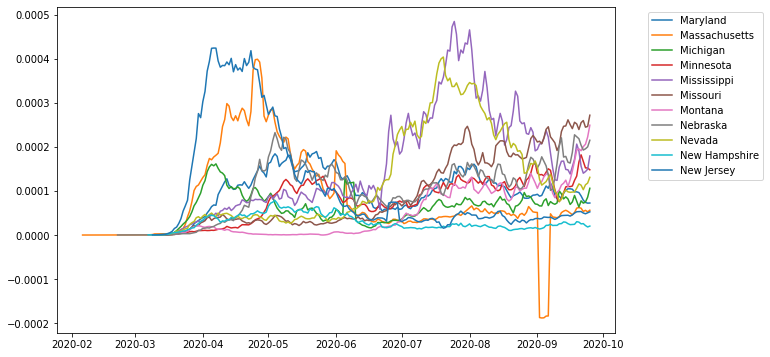

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
for i, (state_name, state) in enumerate(rolling_daily.groupby(level=0)):
    if i<20 or i>30: 
        continue
    total_pop = population_dict[state_name]
    dates = state.index.get_level_values(1)
    ax.plot(dates, state.cases/total_pop, label=state_name)
    
plt.legend(bbox_to_anchor=(1.05, 1));    

## ARIMA

In [46]:
# for i, (state_name, state) in enumerate(rolling_daily.groupby(level=0)):
# rolling_daily.cases

state    date      
Alabama  2020-03-13      NaN
         2020-03-14      NaN
         2020-03-15      NaN
         2020-03-16      NaN
         2020-03-17      NaN
                       ...  
Wyoming  2020-09-21     75.6
         2020-09-22     72.8
         2020-09-23     84.4
         2020-09-24    105.0
         2020-09-25    109.8
Name: cases, Length: 10826, dtype: float64

In [ ]:
def ARIMA_forecast(series, split=0.8, **kwargs):
    L = len(series)
    size = int(np.floor(L*split))
    n_preds = L - size
    
#     size = L - n_preds

    train, test = list(series[:size]), list(series[size:])
    
    mode = kwargs.get('mode', 'Single')
    order = kwargs.get('order', (5,1,0))
    
    history = list(train)#[x for x in train]
    predictions = list()
    
    # 1 by 1
    if mode=='Single':
        predictions, stderr, bounds = [],[],[]
#         print('1 by 1')
        for t in range(len(test)):
            model = ARIMA(history, order=order)
            model_fit = model.fit(disp=0)
            output = model_fit.forecast()
            ypred = round(output[0][0])
            predictions.append(ypred)
            stderr.append(output[1])
            bounds.append(output[2])
            obs = test[t]
            history.append(obs)
            # print(f'predicted={ypred}, expected={obs}')
    
        results = (np.squeeze(predictions), np.squeeze(stderr), np.squeeze(bounds))               
        error = mean_squared_error(test, predictions)
        print(error)
        
    # All at once
    elif mode=='All':
#         print('All at once')
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        results = model_fit.forecast(steps=n_preds)
        predictions, stderr, bounds = results
        

        error = mean_squared_error(test, predictions)
#         print(error)
#     print(f'Test MSE: {error:0.3f}')
    
    return {'error': error,
            'train': train,
            'test': test,
            'results': results,
           }

# we get daily cases by making the model with cases have d=1. So the result of daily_cases having d=0 is the same
output = ARIMA_forecast(state_df.cases, 0.9, **{'mode':'All'})    